# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Export the City_Data into a csv
output_data_file = '/Users/archanakale/Desktop/python-api-challenge/output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



### Generate the Cities List by Using the `citipy` Library

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)


# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []
citiesd = []

In [18]:
# Set the API base URL
record_counter = 0
set_counter = 0

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print('Processing Data: Number and City')


for city in cities:
    query_url = url + '&q=' + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing Record {} of Set {} | {}'.format(record_counter, set_counter, city))
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        citiesd.append(city)
        
    except:
        print('City not found')
        pass

print('Data Retrieval Complete')

Processing Data: Number and City
Processing Record 1 of Set 0 | lycksele
Processing Record 2 of Set 0 | bethel
Processing Record 3 of Set 0 | ushuaia
Processing Record 4 of Set 0 | ugoofaaru
Processing Record 5 of Set 0 | adamstown
Processing Record 6 of Set 0 | floro
Processing Record 7 of Set 0 | port-aux-francais
Processing Record 8 of Set 0 | lazaro cardenas
Processing Record 9 of Set 0 | nguigmi
Processing Record 10 of Set 0 | puerto natales
Processing Record 11 of Set 0 | codrington
Processing Record 12 of Set 0 | happy valley-goose bay
Processing Record 13 of Set 0 | hede
Processing Record 14 of Set 0 | vorgashor
Processing Record 15 of Set 0 | yuzhno-kurilsk
Processing Record 16 of Set 0 | cruzeiro do sul
Processing Record 17 of Set 0 | kiunga
Processing Record 18 of Set 0 | wamba
Processing Record 19 of Set 0 | panna
Processing Record 20 of Set 0 | bilibino
Processing Record 21 of Set 0 | edinburgh of the seven seas
Processing Record 22 of Set 0 | dudinka
Processing Record 23 

ConnectTimeout: HTTPConnectionPool(host='api.openweathermap.org', port=80): Max retries exceeded with url: /data/2.5/weather?units=Imperial&APPID=1e1d0212bdbfdf3d918c6aa1e855eeb9&q=kill%20devil%20hills (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x15d2e6490>, 'Connection to api.openweathermap.org timed out. (connect timeout=None)'))

In [ ]:
# create a dataframe from cities, lat, temp, humidity, cloudiness, wind speed and wind speed
weather_dict = {
    'City': citiesd,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind,
    'Country': country,
    'Date': date
}

weather_data = pd.DataFrame(weather_dict)


In [ ]:
# Display sample data
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,71.80,82,91,11.43,US,1713773119
1,adamstown,-25.0660,-130.1015,72.18,74,89,27.69,PN,1713773119
2,hechuan,29.9947,106.2572,65.89,86,100,3.65,CN,1713773120
3,blackmans bay,-43.0167,147.3167,58.35,72,100,1.05,AU,1713773120
4,hamilton,39.1834,-84.5333,39.13,68,0,2.19,US,1713773121


In [ ]:
# Export the City_Data into a csv file
weather_data.to_csv(output_data_file)

# read saved data       
weather_data = pd.read_csv(output_data_file)
weather_data = weather_data.drop(columns='Unnamed: 0')
weather_data.head()

# Display the data frame
weather_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,71.80,82,91,11.43,US,1713773119
1,adamstown,-25.0660,-130.1015,72.18,74,89,27.69,PN,1713773119
2,hechuan,29.9947,106.2572,65.89,86,100,3.65,CN,1713773120
3,blackmans bay,-43.0167,147.3167,58.35,72,100,1.05,AU,1713773120
4,hamilton,39.1834,-84.5333,39.13,68,0,2.19,US,1713773121


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [ ]:
# create a summary statistics table
weather_data.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,18.828747,17.661578,62.835552,68.376130,60.522604,8.261646,1.713773e+09
std,31.757506,89.692866,21.026929,22.645494,40.701769,5.756691,8.364154e+01
min,-54.800000,-176.559700,-7.560000,7.000000,0.000000,0.290000,1.713773e+09
25%,-5.433300,-64.383100,45.090000,57.000000,14.000000,3.870000,1.713773e+09
50%,22.589200,22.503900,66.290000,74.000000,76.000000,6.820000,1.713773e+09
75%,45.123000,99.000000,80.150000,86.000000,100.000000,11.630000,1.713773e+09
max,78.218600,178.004200,111.450000,100.000000,100.000000,37.960000,1.713773e+09


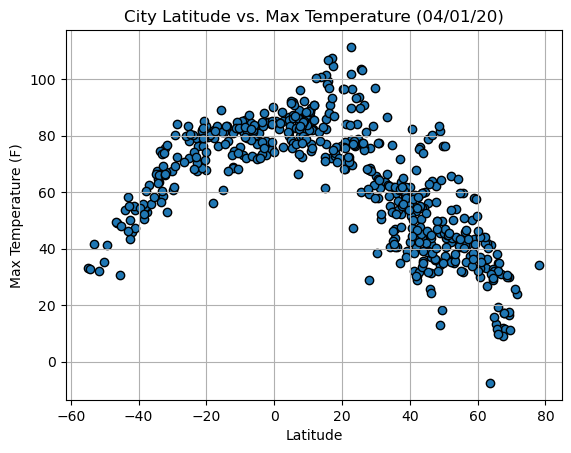

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], edgecolors='black')
plt.title('City Latitude vs. Max Temperature (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('/Users/archanakale/Desktop/python-api-challenge/output_data/lat_vs_temp.png')
plt.show()

#### Latitude Vs. Humidity

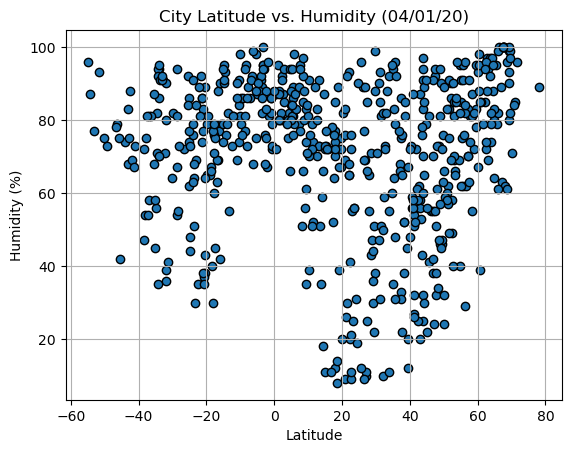

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(weather_data['Lat'], weather_data['Humidity'], edgecolors='black')
plt.title('City Latitude vs. Humidity (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('/Users/archanakale/Desktop/python-api-challenge/output_data/lat_vs_humidity.png')
plt.show()


#### Latitude Vs. Cloudiness

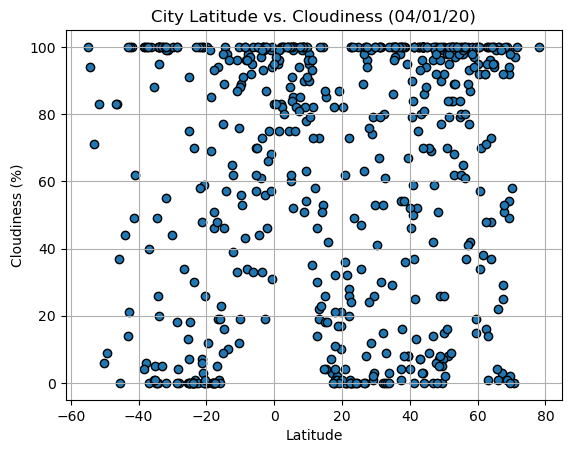

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], edgecolors='black')
plt.title('City Latitude vs. Cloudiness (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('/Users/archanakale/Desktop/python-api-challenge/output_data/lat_vs_cloudiness.png')
plt.show()


#### Latitude vs. Wind Speed Plot

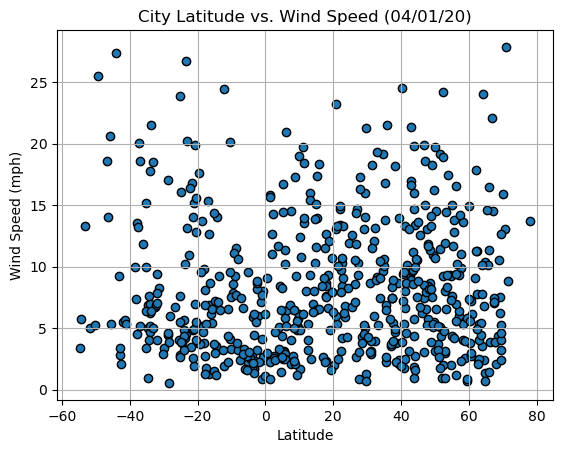

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], edgecolors='black')
plt.title('City Latitude vs. Wind Speed (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('/Users/archanakale/Desktop/python-api-challenge/output_data/lat_vs_wind_speed.png')
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plot
# make a list of all indices 
north= weather_data[weather_data['Lat'] >=0].index
print(north)
south= weather_data[weather_data['Lat'] <0 ].index
print(south)



Index([  0,   2,   3,   4,   5,   7,   8,   9,  13,  16,
       ...
       576, 578, 580, 581, 582, 583, 584, 585, 586, 588],
      dtype='int64', length=403)
Index([  1,   6,  10,  11,  12,  14,  15,  17,  19,  20,
       ...
       560, 562, 567, 570, 574, 577, 579, 587, 589, 590],
      dtype='int64', length=188)


In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemisphere = weather_data.iloc[north]
north_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,selfoss,63.9331,-20.9971,40.80,74,37,3.53,IS,1713741654
2,happy valley-goose bay,53.3168,-60.3315,41.52,66,97,6.58,CA,1713741655
3,ola,59.5833,151.2833,26.91,78,15,0.69,RU,1713741178
4,yellowknife,62.4560,-114.3525,44.53,72,16,7.74,CA,1713741656
5,songling,31.1933,120.7176,59.85,93,100,2.91,CN,1713741656


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemisphere = weather_data.iloc[south]
south_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,margaret river,-33.9500,115.0667,60.80,70,95,17.81,AU,1713741654
6,flying fish cove,-10.4217,105.6791,81.45,84,100,20.15,CX,1713741485
10,young,-32.6833,-57.6333,67.44,91,100,6.71,UY,1713741658
11,arraial do cabo,-22.9661,-42.0278,75.34,69,0,13.15,BR,1713741659
12,avarua,-21.2078,-159.7750,78.78,74,48,14.05,CK,1713741659


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8585717196994406


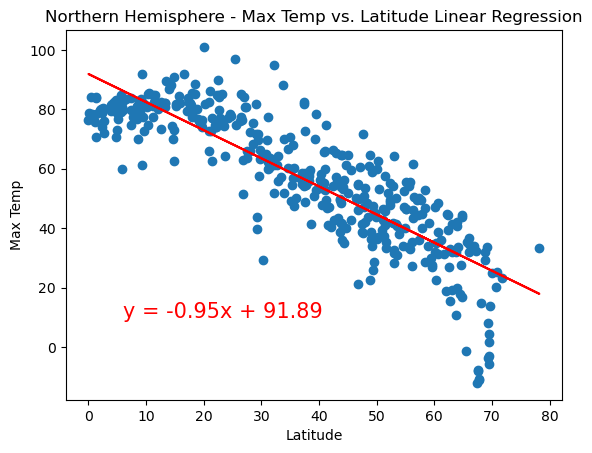

In [ ]:
# Linear regression on Northern Hemisphere
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig('/Users/archanakale/Desktop/python-api-challenge/output_data/north_temp_vs_lat.png')
plt.show()

The r-squared is: 0.7891905402552327


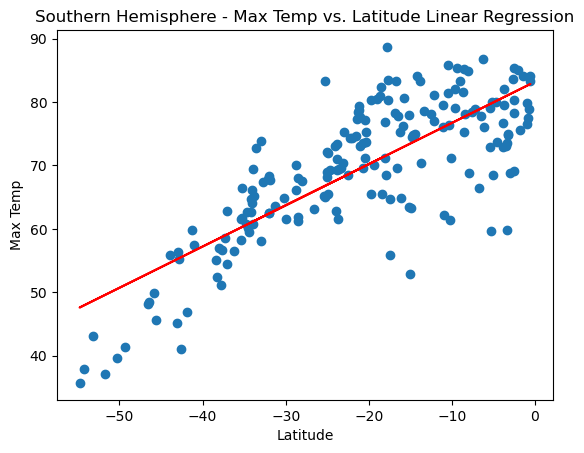

In [ ]:
# Linear regression on Southern Hemisphere
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig('/Users/archanakale/Desktop/python-api-challenge/output_data/south_temp_vs_lat.png')
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.11335548608616011


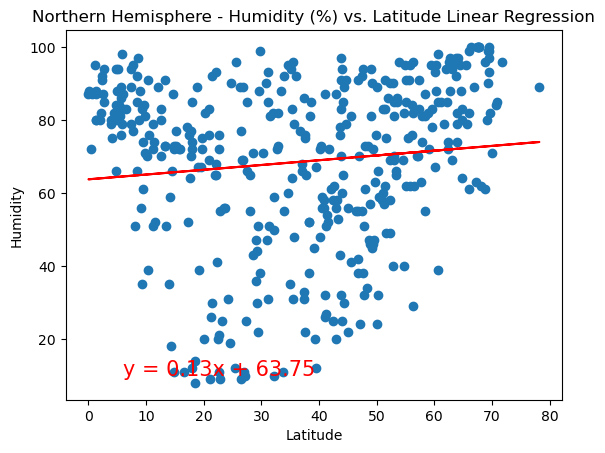

In [ ]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig('/Users/archanakale/Desktop/python-api-challenge/output_data/north_humidity_vs_lat.png')
plt.show()

The r-squared is: 0.2393321382897058


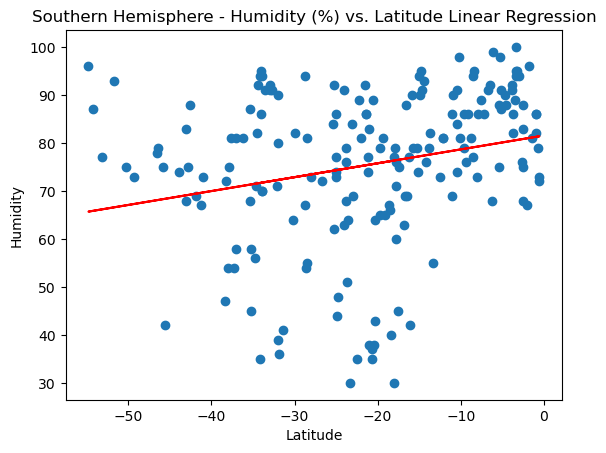

In [ ]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig('/Users/archanakale/Desktop/python-api-challenge/output_data/south_humidity_vs_lat.png')
plt.show()


### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0336811226670305


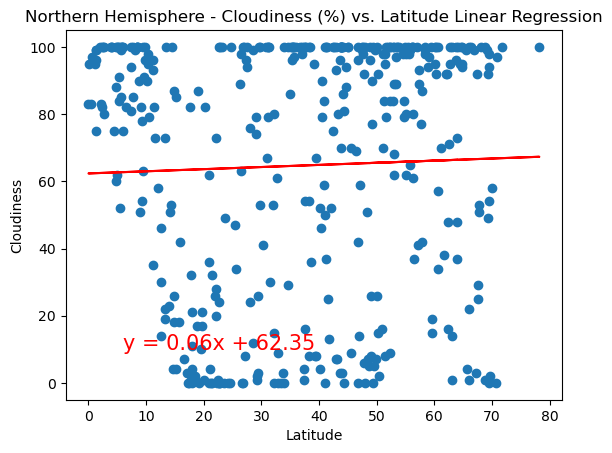

In [ ]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig('/Users/archanakale/Desktop/python-api-challenge/output_data/north_cloudiness_vs_lat.png')
plt.show()


The r-squared is: 0.15384993054110546


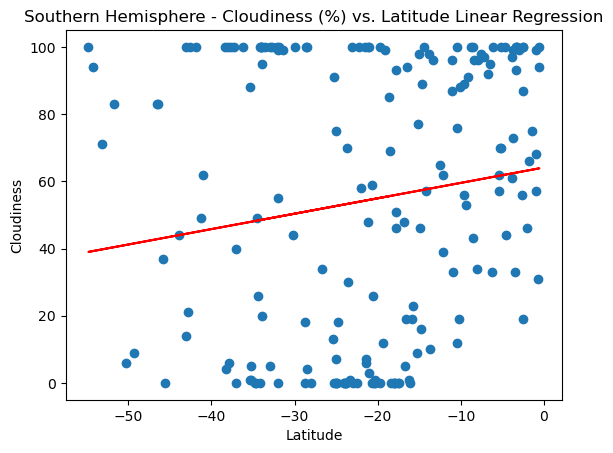

In [ ]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig('/Users/archanakale/Desktop/python-api-challenge/output_data/south_cloudiness_vs_lat.png')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.030425999443825315


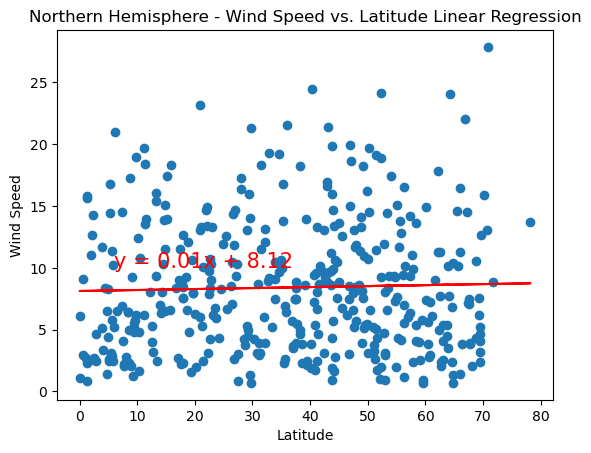

In [ ]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig('/Users/archanakale/Desktop/python-api-challenge/output_data/north_wind_speed_vs_lat.png')
plt.show()


The r-squared is: -0.2785510377906731


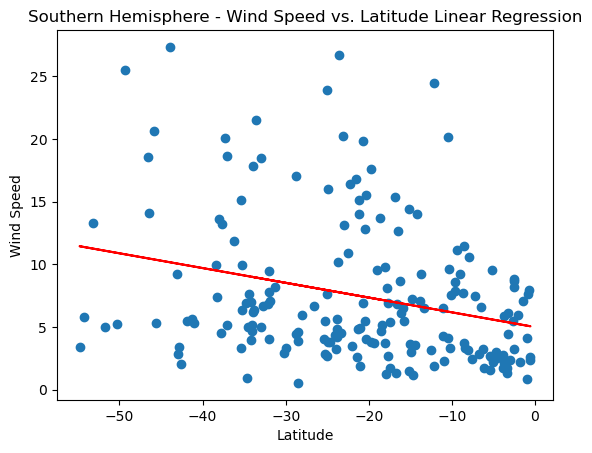

In [ ]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.savefig('/Users/archanakale/Desktop/python-api-challenge/output_data/south_wind_speed_vs_lat.png')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE